In [28]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split

In [29]:
files = [file for file in os.listdir ('./EPL_teams_2223')]
EPL_2223=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2223", file)) # This line!
    EPL_2223= pd.concat ([EPL_2223, df], ignore_index=True)
EPL_2223.to_csv("EPL_2223.csv",index= False)
EPL_2223.shape

(760, 87)

In [30]:
files = [file for file in os.listdir ('./EPL_teams_2122')]
EPL_2122=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2122", file)) # This line!
    EPL_2122= pd.concat ([EPL_2122, df], ignore_index=True)
EPL_2122.to_csv("EPL_2122.csv",index= False)

EPL_2122.shape

(760, 87)

In [31]:
files = [file for file in os.listdir ('./EPL_teams_2021')]
EPL_2021=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2021", file)) # This line!
    EPL_2021= pd.concat ([EPL_2021, df], ignore_index=True)
EPL_2021.to_csv("EPL_2021.csv",index= False)

EPL_2021.columns


Index(['Rk', 'Team', 'Date', 'Opp', 'Comp', 'Result', 'GF', 'GA', 'GD', 'Poss',
       'G-PK', 'PK', 'PKatt', 'PKm', 'Cmp', 'Att', 'Cmp%', 'KP', '1/3', 'PPA',
       'CrsPA', 'PrgP', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att.4', 'Tkl%', 'Lost',
       'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'xG', 'npxG',
       'xGD', 'npxGD', 'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh',
       'Sh.1', 'G/Sh', 'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'PSxG',
       'PSxG/SoT', 'PSxG+/-', 'Touches', 'Def Pen', 'Def 3rd.1', 'Mid 3rd.1',
       'Att 3rd.1', 'Att Pen', 'Live', 'Carries', 'TotDist.1', 'PrgDist.1',
       'PrgC', '1/3.1', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR', 'Match Report'],
      dtype='object')

# CONCAT TABLES 20/21-22/23

In [32]:
df_EPL = pd.concat([EPL_2223, EPL_2122, EPL_2021], ignore_index=True)

df_EPL.fillna(0, inplace=True)
df_EPL = df_EPL.drop(['Rk', 'Comp', 'Match Report'], axis=1)
df_EPL

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PK,PK,...,Carries,TotDist.1,PrgDist.1,PrgC,1/3.1,CPA,Mis,Dis,Rec,PrgR
0,Arsenal,2023-05-28,Wolves,W 5-0,5,0,5,51,5,0,...,341,1815,998,20,14,8,10,5,410,44
1,Arsenal,2023-05-20,Nott'ham Forest,L 0-1,0,1,-1,81,0,0,...,583,3252,2012,30,25,5,16,11,656,71
2,Arsenal,2023-05-14,Brighton,L 0-3,0,3,-3,41,0,0,...,269,1281,704,14,8,10,9,11,286,27
3,Arsenal,2023-05-07,Newcastle Utd,W 2-0,2,0,2,45,1,0,...,266,1236,563,16,12,3,20,11,286,26
4,Arsenal,2023-05-02,Chelsea,W 3-1,3,1,2,55,3,0,...,415,1891,911,17,12,9,8,9,481,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,Wolves,2020-10-19,Leeds United,W 1-0,1,0,1,34,1,0,...,155,1130,603,16,10,4,20,8,203,25
2276,Wolves,2020-10-04,Fulham,W 1-0,1,0,1,48,1,0,...,409,1748,974,11,13,4,9,6,439,27
2277,Wolves,2020-09-27,West Ham,L 0-4,0,4,-4,63,0,0,...,481,2613,1349,27,19,2,17,13,574,44
2278,Wolves,2020-09-21,Manchester City,L 1-3,1,3,-2,35,1,0,...,285,1410,717,17,12,4,14,12,288,24


In [33]:
for i, row in df_EPL.iterrows():
    string = row['Result']
    if string[0] == 'W':
        df_EPL.loc[i, 'Result'] = 'W'
    if string[0] == 'L':
        df_EPL.loc[i, 'Result'] = 'L'
    if string[0] == 'D':
        df_EPL.loc[i, 'Result'] = 'D'

df_EPL["Result"] = df_EPL["Result"].map({"W" : 0 , "L" : 2, "D": 1})

In [34]:
df_EPL.columns

Index(['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PK', 'PK',
       'PKatt', 'PKm', 'Cmp', 'Att', 'Cmp%', 'KP', '1/3', 'PPA', 'CrsPA',
       'PrgP', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2',
       'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Tkl', 'TklW', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att.4', 'Tkl%', 'Lost', 'Blocks', 'Sh',
       'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD',
       'xAG', 'xA', 'G-xG', 'np:G-xG', 'A-xAG', 'npxG/Sh', 'Sh.1', 'G/Sh',
       'G/SoT', 'SoT', 'SoT%', 'Dist', 'FK', 'PSxG', 'PSxG/SoT', 'PSxG+/-',
       'Touches', 'Def Pen', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Att Pen',
       'Live', 'Carries', 'TotDist.1', 'PrgDist.1', 'PrgC', '1/3.1', 'CPA',
       'Mis', 'Dis', 'Rec', 'PrgR'],
      dtype='object')

['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK', 'PSxG', 'PSxG/SoT',
           'PSxG-GA', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']


In [35]:
df_EPL.columns =['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK', 'PSxG', 'PSxG/SoT',
           'PSxG-GA', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']
df_EPL

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,PG,...,Carr,CarrDist,CarrPrgDist,CarrPrg,Carr2fin,Carr2pa,CarrF,CarrD,Rec,PrgR
0,Arsenal,2023-05-28,Wolves,0,5,0,5,51,5,0,...,341,1815,998,20,14,8,10,5,410,44
1,Arsenal,2023-05-20,Nott'ham Forest,2,0,1,-1,81,0,0,...,583,3252,2012,30,25,5,16,11,656,71
2,Arsenal,2023-05-14,Brighton,2,0,3,-3,41,0,0,...,269,1281,704,14,8,10,9,11,286,27
3,Arsenal,2023-05-07,Newcastle Utd,0,2,0,2,45,1,0,...,266,1236,563,16,12,3,20,11,286,26
4,Arsenal,2023-05-02,Chelsea,0,3,1,2,55,3,0,...,415,1891,911,17,12,9,8,9,481,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,Wolves,2020-10-19,Leeds United,0,1,0,1,34,1,0,...,155,1130,603,16,10,4,20,8,203,25
2276,Wolves,2020-10-04,Fulham,0,1,0,1,48,1,0,...,409,1748,974,11,13,4,9,6,439,27
2277,Wolves,2020-09-27,West Ham,2,0,4,-4,63,0,0,...,481,2613,1349,27,19,2,17,13,574,44
2278,Wolves,2020-09-21,Manchester City,2,1,3,-2,35,1,0,...,285,1410,717,17,12,4,14,12,288,24


In [36]:
df_EPL.to_csv("EPL.csv",index= False)

# RANDOM FOREST

In [37]:
X = df_EPL.drop(columns=['Date', 'Result', 'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt',
                         'PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA', 'G/S', 'G/SoT'], axis=1)

y = df_EPL['Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train

,Team,Opp,Poss,OPcmp,OPatt,OP%,KP,OP2fin,OP2pa,C2pa,...,Carr,CarrDist,CarrPrgDist,CarrPrg,Carr2fin,Carr2pa,CarrF,CarrD,Rec,PrgR
1166,Liverpool,Arsenal,62,587,677,86.7,13,31,6,1,...,441,1878,984,21,15,11,14,3,585,43
278,Everton,Nott'ham Forest,43,262,398,65.8,8,18,8,3,...,268,1384,602,12,10,4,17,13,262,29
983,Chelsea,Tottenham,53,484,573,84.5,17,35,12,2,...,409,1650,819,17,18,5,16,10,472,48
2138,Tottenham,Arsenal,48,421,520,81.0,3,16,4,0,...,336,1553,676,8,11,1,7,10,417,27
185,Brighton,Fulham,61,477,583,81.8,5,36,10,3,...,474,2135,1058,15,7,3,22,14,475,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Everton,Leicester City,37,288,397,72.5,12,24,6,2,...,251,1439,648,15,8,2,15,7,287,26
1731,Crystal Palace,Sheffield Utd,44,332,462,71.9,8,19,4,1,...,265,1662,837,16,20,2,11,13,330,33
763,Arsenal,Leeds United,64,596,682,87.4,12,75,13,3,...,498,2123,1046,18,12,7,13,12,594,69
835,Aston Villa,Watford,62,464,567,81.8,6,34,7,1,...,462,2309,1218,24,18,6,24,13,463,42


In [38]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Team', 'Opp'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_train = sta.fit_transform(X_train)
X_test = sta.transform(X_test)

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15)
rfc.fit(X_train, y_train)

# Evaluating on Training set
y_pred_train = rfc.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       619
           1       1.00      1.00      1.00       378
           2       1.00      1.00      1.00       599

    accuracy                           1.00      1596
   macro avg       1.00      1.00      1.00      1596
weighted avg       1.00      1.00      1.00      1596



In [40]:
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       263
           1       0.34      0.25      0.29       138
           2       0.75      0.77      0.76       283

    accuracy                           0.67       684
   macro avg       0.60      0.60      0.60       684
weighted avg       0.65      0.67      0.66       684



In [41]:
rfc.feature_importances_

array([0.0122383 , 0.01079732, 0.00872086, 0.00671615, 0.00761039,
       0.01260834, 0.00936358, 0.01044246, 0.00971582, 0.01545158,
       0.00986456, 0.00806671, 0.01038821, 0.00918603, 0.00900174,
       0.01431294, 0.00721299, 0.00921968, 0.01618362, 0.00979765,
       0.01447455, 0.01378853, 0.01023313, 0.00877231, 0.00930099,
       0.00824063, 0.00755974, 0.00984822, 0.01027631, 0.01411377,
       0.01114094, 0.00969525, 0.00723824, 0.00852224, 0.01052116,
       0.00953772, 0.02776776, 0.00386777, 0.03231769, 0.02379711,
       0.07708405, 0.04535015, 0.01562817, 0.008955  , 0.0150687 ,
       0.00923331, 0.01656517, 0.03551961, 0.01502601, 0.00324557,
       0.09226373, 0.03148156, 0.00709413, 0.01570224, 0.01211724,
       0.00467622, 0.01344926, 0.01035668, 0.00785752, 0.01067717,
       0.01010659, 0.01051944, 0.01154489, 0.0106199 , 0.01296219,
       0.0109028 , 0.01159227, 0.00704942, 0.00943798])

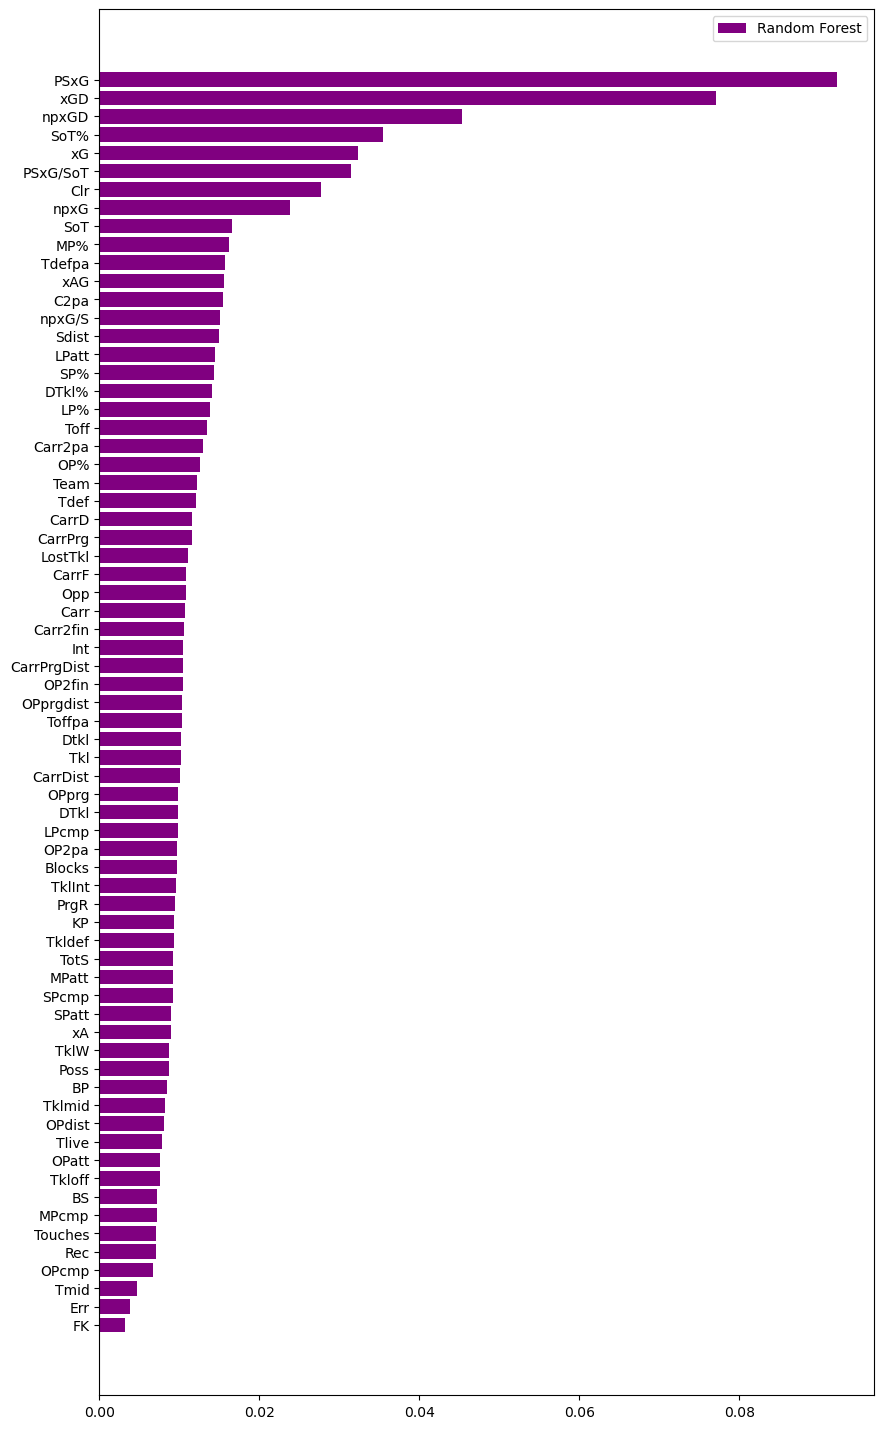

In [42]:
feature_importance = pd.DataFrame({'rfc':rfc.feature_importances_},index = df_EPL.drop(columns=['Date', 'Result',
                                  'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt','PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA',
                                  'G/S', 'G/SoT']).columns)
feature_importance.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize = (10,18))
rfc_feature = ax.barh(index, feature_importance['rfc'], color = 'purple', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance.index)

ax.legend()
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()

# ADDING OPP STATS

In [43]:
df_EPL.columns =['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK', 'PSxG', 'PSxG/SoT',
           'PSxG-GA', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']
df_EPL

,Team,Date,Opp,Result,GF,GA,GD,Poss,G-PG,PG,...,Carr,CarrDist,CarrPrgDist,CarrPrg,Carr2fin,Carr2pa,CarrF,CarrD,Rec,PrgR
0,Arsenal,2023-05-28,Wolves,0,5,0,5,51,5,0,...,341,1815,998,20,14,8,10,5,410,44
1,Arsenal,2023-05-20,Nott'ham Forest,2,0,1,-1,81,0,0,...,583,3252,2012,30,25,5,16,11,656,71
2,Arsenal,2023-05-14,Brighton,2,0,3,-3,41,0,0,...,269,1281,704,14,8,10,9,11,286,27
3,Arsenal,2023-05-07,Newcastle Utd,0,2,0,2,45,1,0,...,266,1236,563,16,12,3,20,11,286,26
4,Arsenal,2023-05-02,Chelsea,0,3,1,2,55,3,0,...,415,1891,911,17,12,9,8,9,481,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,Wolves,2020-10-19,Leeds United,0,1,0,1,34,1,0,...,155,1130,603,16,10,4,20,8,203,25
2276,Wolves,2020-10-04,Fulham,0,1,0,1,48,1,0,...,409,1748,974,11,13,4,9,6,439,27
2277,Wolves,2020-09-27,West Ham,2,0,4,-4,63,0,0,...,481,2613,1349,27,19,2,17,13,574,44
2278,Wolves,2020-09-21,Manchester City,2,1,3,-2,35,1,0,...,285,1410,717,17,12,4,14,12,288,24


Features for opps to consider:\
OPP_PSxG\
OPP_SoT%\
OPP_PSxG/SoT\
OPP_Clr\
OPP_xAG\
OPP_SoT\
OPP_Tdefpa\
OPP_npxG/S\
OPP_C2pa\
OPP_MP%\
OPP_LPatt\
OPP_Sdist\
OPP_DTkl%\
OPP_OP%\
OPP_SP%\
OPP_Tdef\
OPP_Toff\
OPP_LP%\
OPP_Carr2pa

In [56]:
'''newfeatures = ['OPP_PSxG', 'OPP_SoT%','OPP_PSxG/SoT','OPP_Clr','OPP_xAG','OPP_SoT','OPP_Tdefpa','OPP_npxG/S',
               'OPP_C2pa','OPP_MP%','OPP_LPatt','OPP_Sdist','OPP_DTkl%','OPP_OP%','OPP_SP%','OPP_Tdef',
               'OPP_Toff','OPP_LP%','OPP_Carr2pa']

df_EPL_opp = df_EPL.copy()

for i in newfeatures:
    df[i] = ''

for j, row in df_EPL.iterrows():
    for k, r in df_EPL.iterrows():
        if row['Team'] == r['Opp'] and row['Date'] == r['Date']:
            for i in newfeatures:
                df_EPL_opp.loc[k, i] = df_EPL_opp.loc[j, i[4:]]
            continue
df_EPL_opp.to_csv("EPL_opp.csv",index= False)'''

'newfeatures = [\'OPP_PSxG\', \'OPP_SoT%\',\'OPP_PSxG/SoT\',\'OPP_Clr\',\'OPP_xAG\',\'OPP_SoT\',\'OPP_Tdefpa\',\'OPP_npxG/S\',\n               \'OPP_C2pa\',\'OPP_MP%\',\'OPP_LPatt\',\'OPP_Sdist\',\'OPP_DTkl%\',\'OPP_OP%\',\'OPP_SP%\',\'OPP_Tdef\',\n               \'OPP_Toff\',\'OPP_LP%\',\'OPP_Carr2pa\']\n\ndf_EPL_opp = df_EPL.copy()\n\nfor i in newfeatures:\n    df[i] = \'\'\n\nfor j, row in df_EPL.iterrows():\n    for k, r in df_EPL.iterrows():\n        if row[\'Team\'] == r[\'Opp\'] and row[\'Date\'] == r[\'Date\']:\n            for i in newfeatures:\n                df_EPL_opp.loc[k, i] = df_EPL_opp.loc[j, i[4:]]\n            continue\ndf_EPL_opp.to_csv("EPL_opp.csv",index= False)'

In [57]:
df_EPL_opp = pd.read_csv("EPL_opp.csv", sep = ",")

# Random forest with opp

In [62]:
X_opp = df_EPL_opp.drop(columns=['Date', 'Result', 'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt',
                         'PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA', 'G/S', 'G/SoT'], axis=1)

y_opp = df_EPL_opp['Result']


X_train_opp, X_test_opp, y_train_opp, y_test_opp = train_test_split(X_opp, y_opp, test_size = 0.3, random_state = 0)

encoder = ce.OrdinalEncoder(cols=['Team', 'Opp'])
X_train_opp = encoder.fit_transform(X_train_opp)
X_test_opp = encoder.transform(X_test_opp)

X_train_opp = sta.fit_transform(X_train_opp)
X_test_opp = sta.transform(X_test_opp)

In [63]:
rfc_opp = RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15)
rfc_opp.fit(X_train_opp, y_train_opp)

# Evaluating on Training set
y_pred_train_opp = rfc_opp.predict(X_train_opp)
print(classification_report(y_train_opp, y_pred_train_opp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       619
           1       1.00      1.00      1.00       378
           2       1.00      1.00      1.00       599

    accuracy                           1.00      1596
   macro avg       1.00      1.00      1.00      1596
weighted avg       1.00      1.00      1.00      1596



In [64]:
y_pred_test_opp = rfc_opp.predict(X_test_opp)
print(classification_report(y_test_opp, y_pred_test_opp))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       263
           1       0.40      0.29      0.34       138
           2       0.77      0.82      0.79       283

    accuracy                           0.71       684
   macro avg       0.64      0.64      0.64       684
weighted avg       0.69      0.71      0.70       684



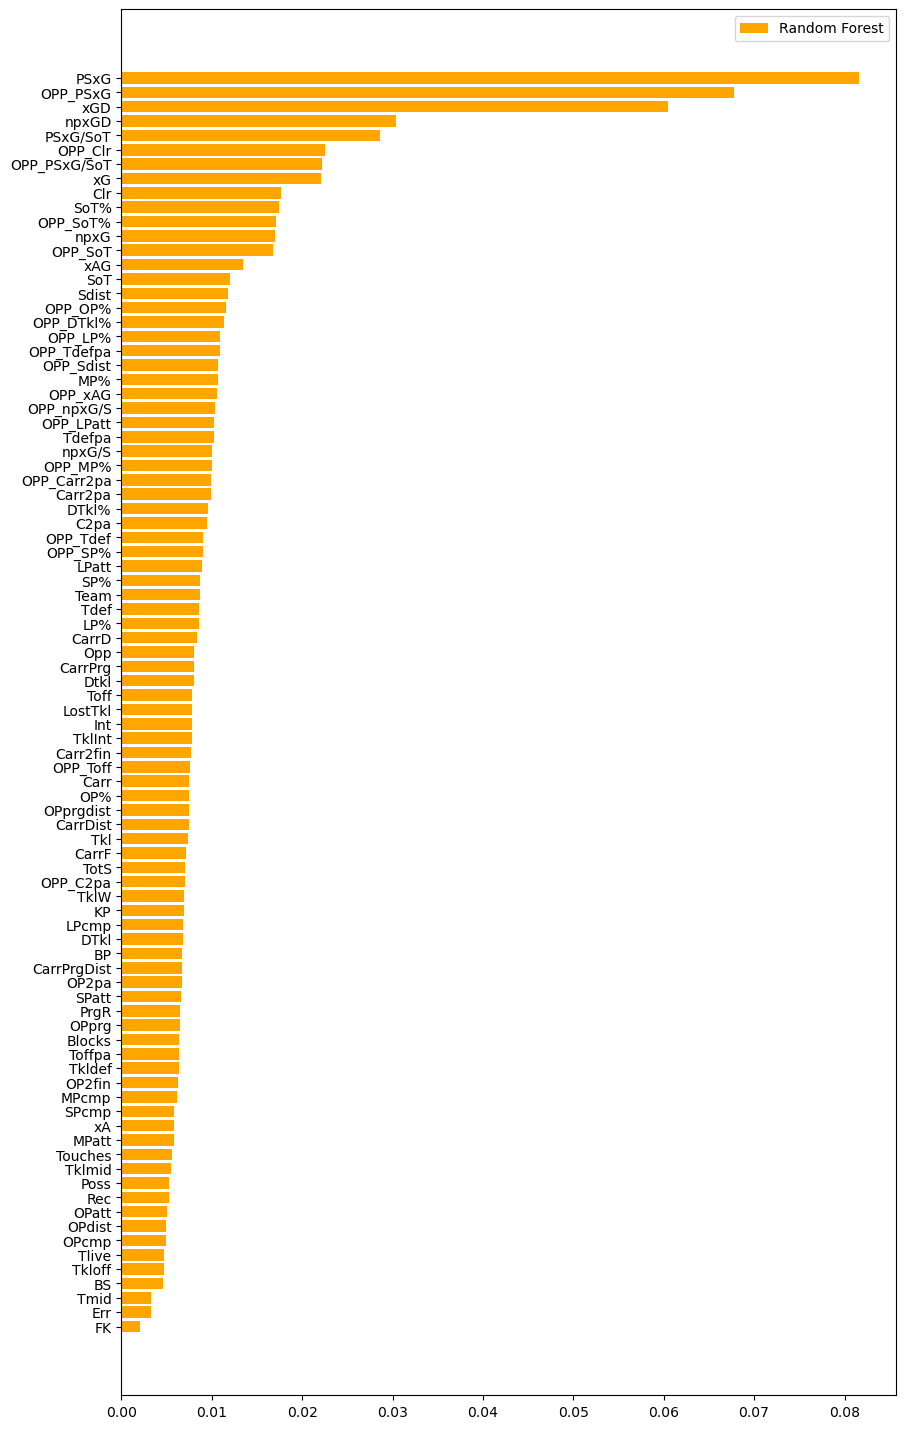

In [67]:
feature_importance_opp = pd.DataFrame({'rfc':rfc_opp.feature_importances_},index = df_EPL_opp.drop(columns=['Date', 'Result',
                                  'GF', 'GA', 'GD', 'G-PG', 'PG', 'PKatt','PKm', 'G-xG', 'npG-npxG', 'A-xAG', 'PSxG-GA',
                                  'G/S', 'G/SoT']).columns)
feature_importance_opp.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance_opp))
fig, ax = plt.subplots(figsize = (10,18))
rfc_feature_opp = ax.barh(index, feature_importance_opp['rfc'], color = 'orange', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance_opp.index)

ax.legend()
plt.savefig("myImagePDF_opp.pdf", format="pdf", bbox_inches="tight")
plt.show()